In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


Bad key savefig.frameon in file G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/ma

In [2]:
# 修改显示中文字体
# plt.rcParams['font.family']=['sans-serif']      
# plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
# 读入数据
house_train = pd.read_csv("train.csv")
house_test = pd.read_csv("test.csv")

print(" train shape:{}\n test shape:{}".format(house_train.shape,house_test.shape))

 train shape:(1460, 81)
 test shape:(1459, 80)


In [4]:
# 查看数据内容信息
# house_train.info()
# print('-----'*10)
# house_test.info()
# import io
# buf = io.StringIO()
# house_test.info(buf=buf)
# s = buf.getvalue()
# with open("house_test_info.txt",'w',encoding="utf-8") as f:
#     f.write(s)

In [5]:
# 数据统计信息
house_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<AxesSubplot:>

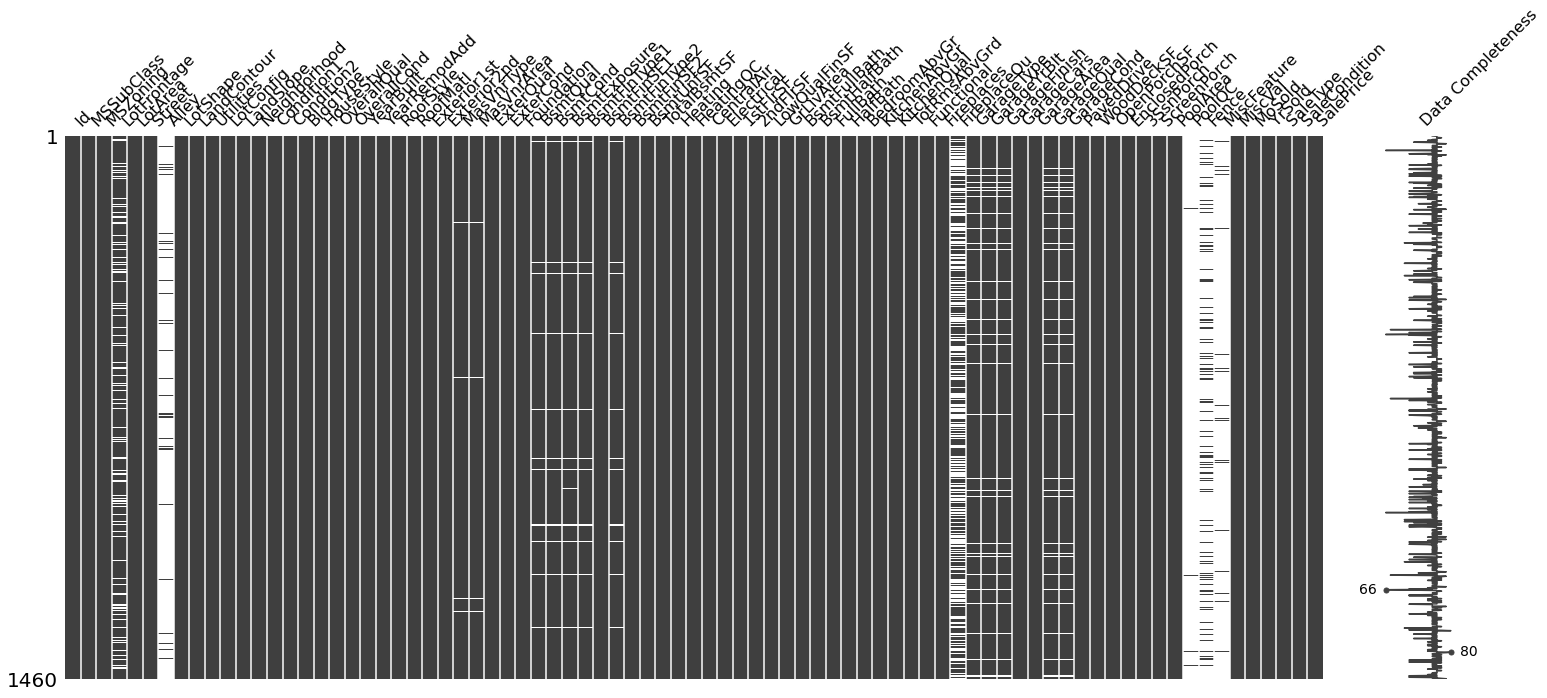

In [6]:
# 查看缺失值分布
import missingno as msno
msno.matrix(house_train,labels=True)

In [7]:
# msno.bar(house_train)

<AxesSubplot:>

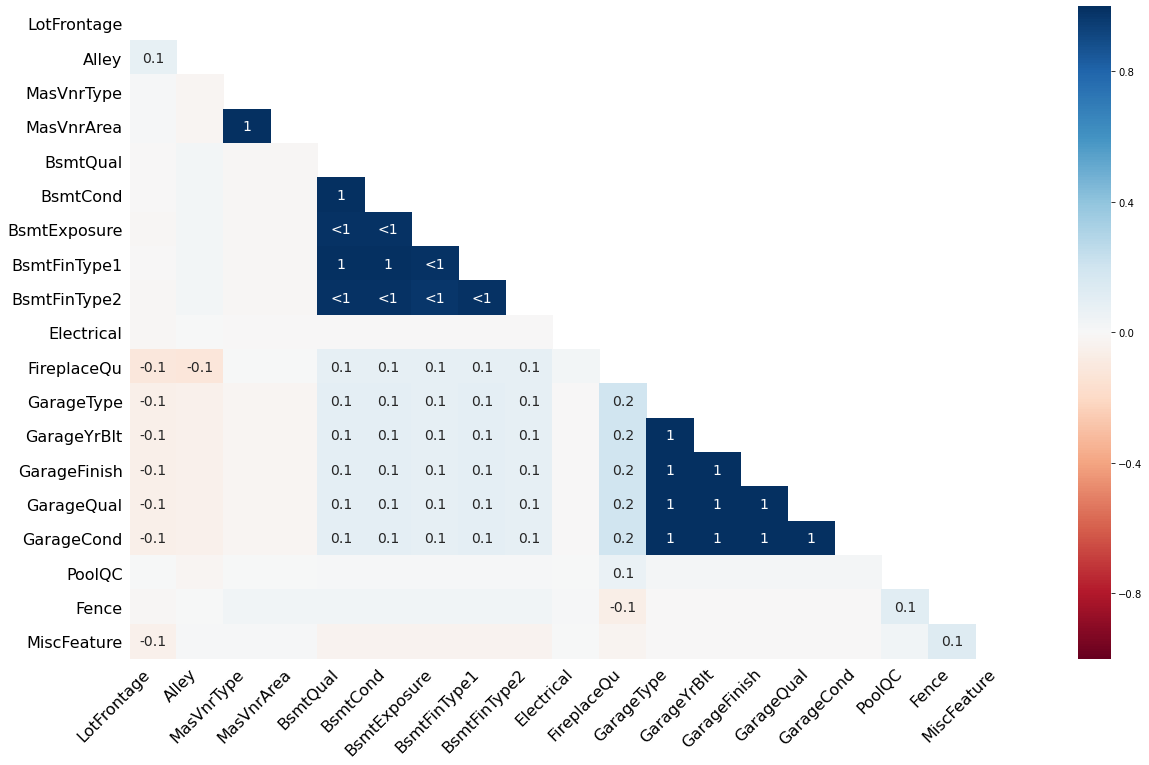

In [8]:
msno.heatmap(house_train)

In [9]:
# 统计缺失值个数
data_null = house_train.isnull().sum()
data_null[data_null>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

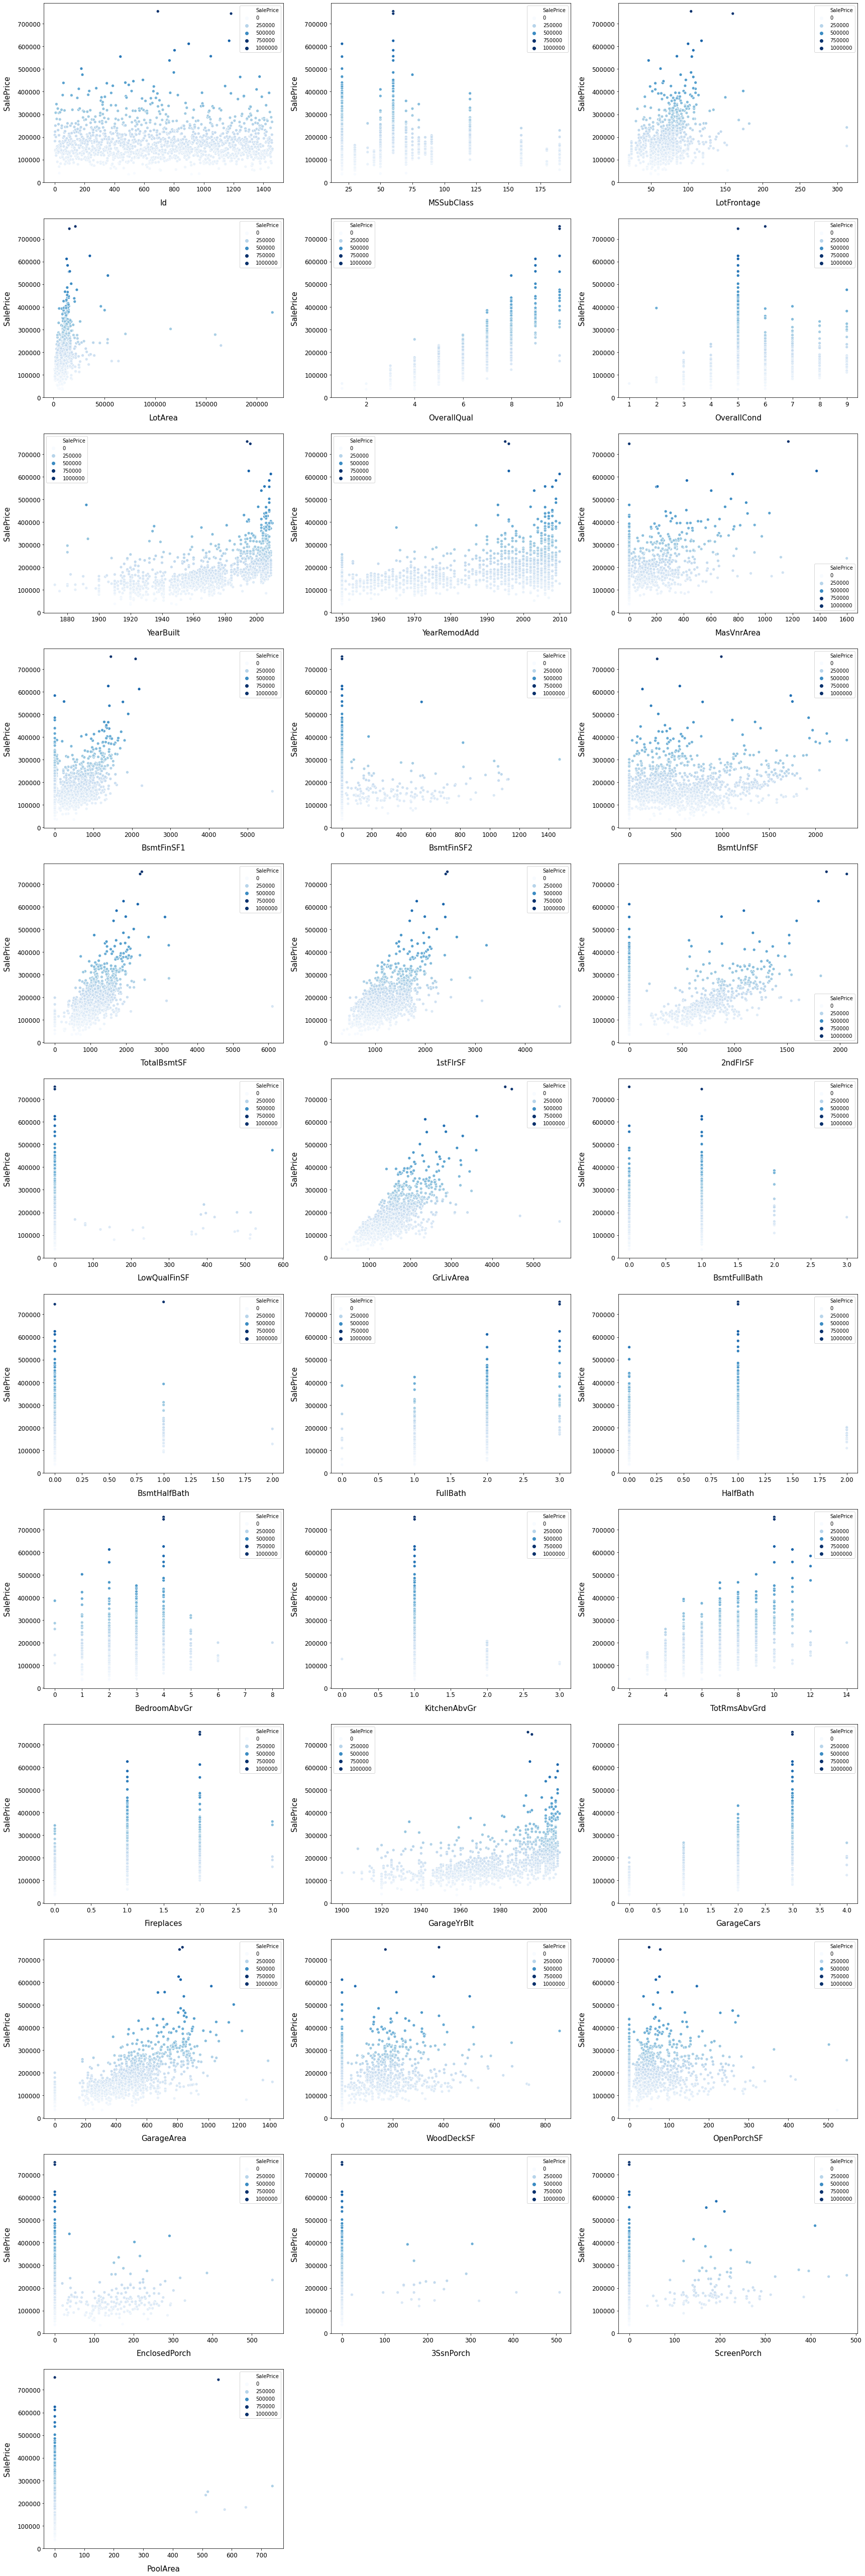

In [10]:
numeric_dtypes=['int16','int32','int64','float16','float32','float64']
numeric = []
for col in house_train.columns:
    if house_train[col].dtype in numeric_dtypes:
        if col in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(col)

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(12,120))
plt.subplots_adjust(right=2,top=2)
sns.color_palette("husl",8)
for i,feature in enumerate(list(house_train[numeric]),1):
    if(feature=="MiscVal"): break
    plt.subplot(len(list(numeric)),3,i)
    sns.scatterplot(x=feature,y="SalePrice",hue="SalePrice",palette="Blues",data=house_train)
    plt.xlabel("{}".format(feature),size=15,labelpad=12.5)
    plt.ylabel("SalePrice",size=15,labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis="x",labelsize=12)
        plt.tick_params(axis="y",labelsize=12)
    
    plt.legend(loc="best", prop={"size":10})

# pic = plt.gcf()
# pic.savefig("数据可视化.png")
plt.show()

In [11]:
house_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

偏度:1.8828757597682129
峰度:6.536281860064529


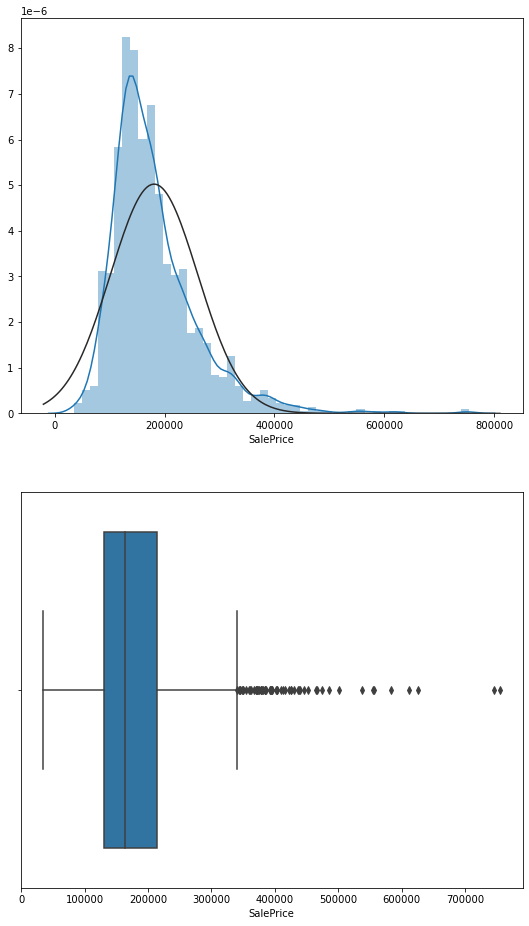

In [12]:
f, ax = plt.subplots(2,1,figsize=(9,16))
sns.distplot(house_train['SalePrice'],fit=stats.norm,ax=ax[0])
sns.boxplot(house_train['SalePrice'])

print("偏度:{}".format(house_train['SalePrice'].skew()))
print("峰度:{}".format(house_train['SalePrice'].kurt()))

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

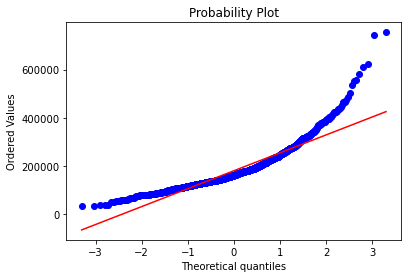

In [13]:
fig = plt.figure()
stats.probplot(house_train['SalePrice'],plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826703))

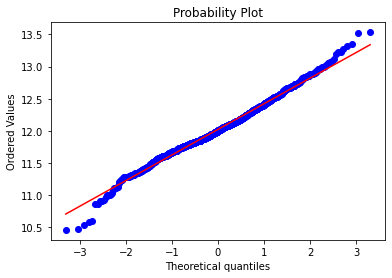

In [14]:
# 数据变换
house_train['SalePrice'] = np.log1p(house_train['SalePrice'])

fig = plt.figure()
stats.probplot(house_train['SalePrice'],plot=plt)

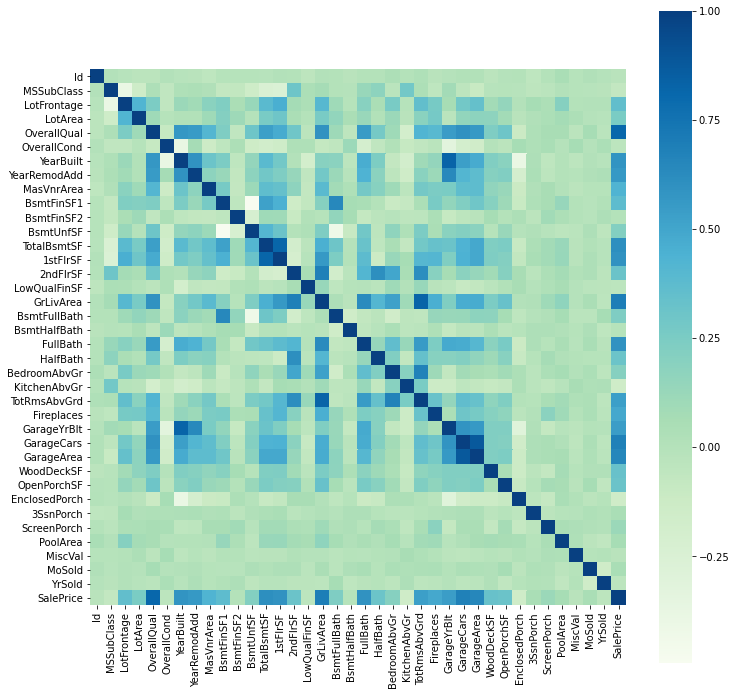

In [15]:
def draw_corr(data):
    corr = data.corr()
    plt.subplots(figsize=(12,12))
    sns.heatmap(corr,vmax=1,square=True,cmap="GnBu")
    plt.show()

draw_corr(house_train)

<AxesSubplot:>

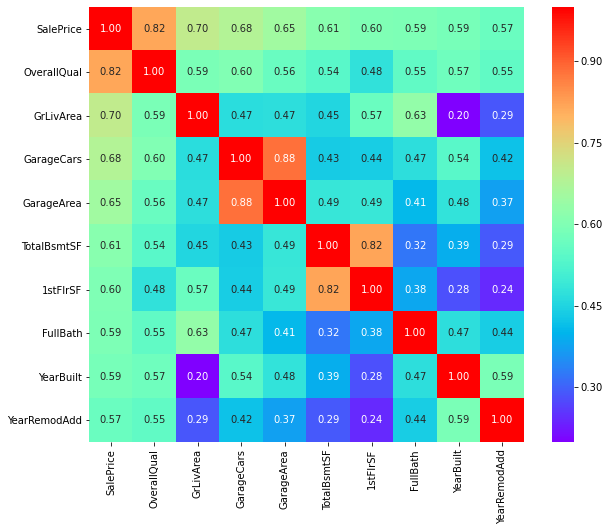

In [16]:
corrmat = house_train.corr()
plt.subplots(figsize=(10,8))
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_train[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f'
           ,annot_kws={"size":10},yticklabels=cols.values
           ,xticklabels=cols.values,cmap="rainbow")

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

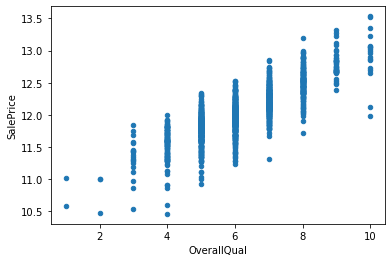

In [17]:
# 删除异常值
mask = (house_train['OverallQual']<5)&(house_train['SalePrice']>12)
house_train.drop(house_train[mask].index,inplace=True)

house_train.plot.scatter(x="OverallQual",y="SalePrice")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

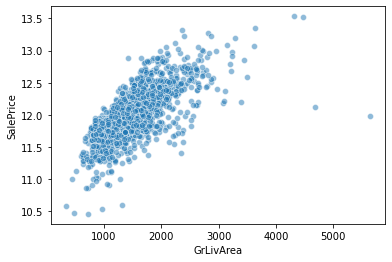

In [18]:
sns.scatterplot(x="GrLivArea",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

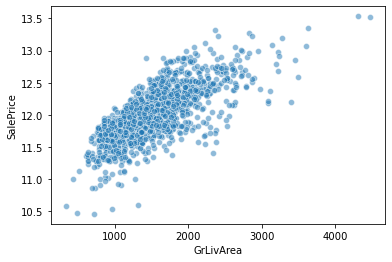

In [19]:
# 删除右面2个异常值
mask = (house_train['GrLivArea']>4000)&(house_train['SalePrice']<12.5)
house_train = house_train.drop(house_train[mask].index)

# 删除后
sns.scatterplot(x="GrLivArea",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

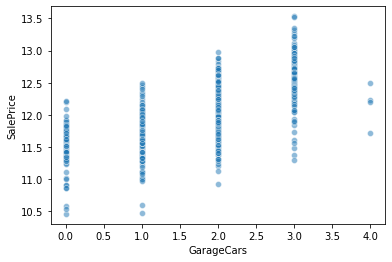

In [20]:
sns.scatterplot(x="GarageCars",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

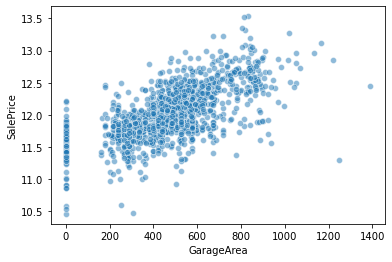

In [21]:
sns.scatterplot(x="GarageArea",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

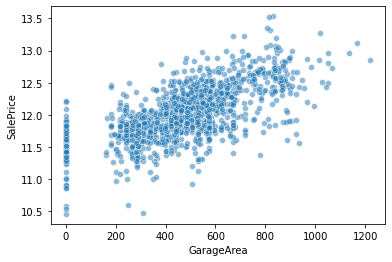

In [22]:
# 删除异常值
mask = (house_train['GarageArea']>1200)&(house_train['SalePrice']<12.5)
house_train.drop(house_train[mask].index,inplace=True)

sns.scatterplot(x="GarageArea",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

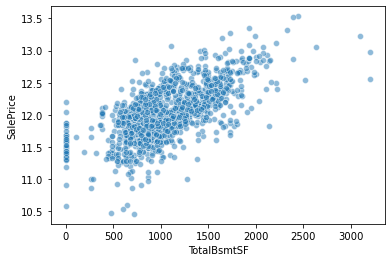

In [23]:
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

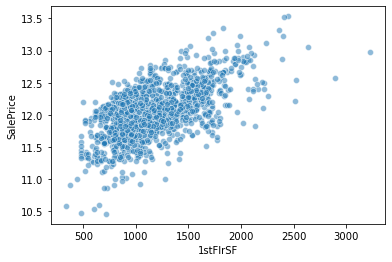

In [24]:
sns.scatterplot(x="1stFlrSF",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

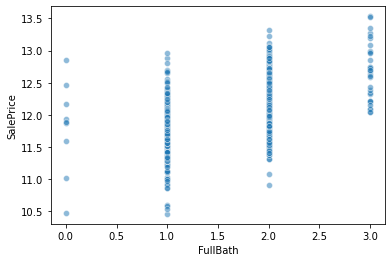

In [25]:
sns.scatterplot(x="FullBath",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

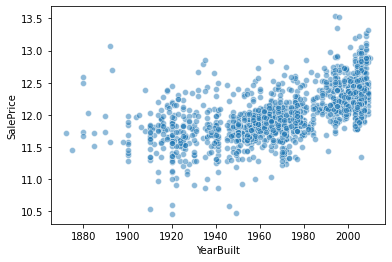

In [26]:
sns.scatterplot(x="YearBuilt",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

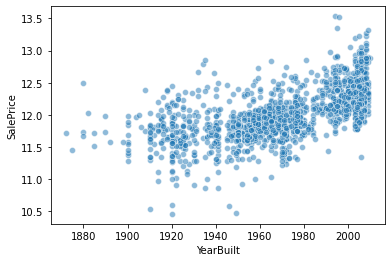

In [27]:
# 删除异常值
mask = (house_train['YearBuilt']<1900)&(house_train["SalePrice"]>12.5)
house_train = house_train.drop(house_train[mask].index)

sns.scatterplot(x="YearBuilt",y="SalePrice",alpha=0.5,data=house_train)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

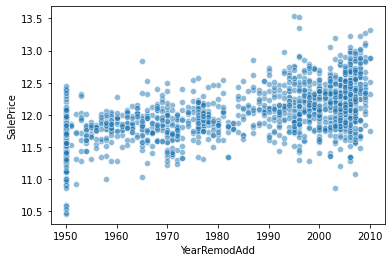

In [28]:
sns.scatterplot(x="YearRemodAdd",y="SalePrice",alpha=0.5,data=house_train)

In [29]:
# 重置索引
house_train.reset_index(drop=True,inplace=True)

In [30]:
# 特征工程
# 合并数据，用整体数据做特征工程
train_num = house_train.shape[0]
test_num = house_test.shape[0]

train_y = house_train.SalePrice.values

all_data = pd.concat((house_train,house_test)).reset_index(drop=True)
all_data.drop(['SalePrice','Id'],axis=1,inplace=True)
all_data.shape,train_num,test_num

((2909, 79), 1450, 1459)

In [31]:
# 缺失值处理
count = all_data.isnull().sum().sort_values(ascending=False)
ratio = count / len(all_data) * 100
cols_type = all_data[count.index].dtypes

missing_data = pd.concat([count,ratio,cols_type],axis=1,keys=['count','ratio','cols_type'])
missing_data = missing_data[missing_data.ratio>0]
missing_data

,count,ratio,cols_type
PoolQC,2900,99.690615,object
MiscFeature,2805,96.424888,object
Alley,2711,93.193537,object
Fence,2339,80.405638,object
FireplaceQu,1418,48.745273,object
LotFrontage,484,16.638020,float64
GarageYrBlt,159,5.465796,float64
GarageFinish,159,5.465796,object
GarageQual,159,5.465796,object
GarageCond,159,5.465796,object


Text(0.5, 1.0, 'Percent missing data by feature')

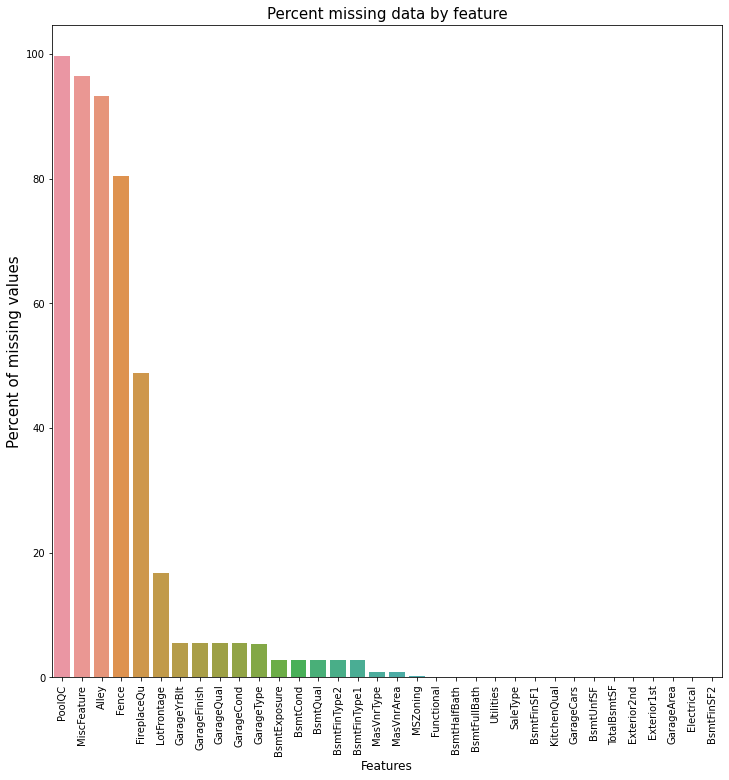

In [32]:
f, axis = plt.subplots(figsize=(12,12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index,y=missing_data.ratio)

plt.xlabel('Features',fontsize=12)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [33]:
# None 填充
str_cols = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageType", "GarageFinish", "GarageQual", "GarageCond",
           "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType", "MSSubClass"]
for col in str_cols:
    all_data[col].fillna("None",inplace=True)

del str_cols,col

In [34]:
num_cols = ["BsmtUnfSF","TotalBsmtSF","BsmtFinSF2","BsmtFinSF1","BsmtFullBath","BsmtHalfBath",
            "MasVnrArea","GarageCars","GarageArea","GarageYrBlt"]
for col in num_cols:
    all_data[col].fillna(0,inplace=True)

del num_cols,col

In [35]:
other_cols = ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]
for col in other_cols:
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)
    
del other_cols, col

In [36]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [37]:
all_data["Utilities"].isnull().sum()

2

In [38]:
all_data["Utilities"].value_counts()

AllPub    2906
NoSeWa       1
Name: Utilities, dtype: int64

In [39]:
all_data.drop(['Utilities'],axis=1,inplace=True)

In [40]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [41]:
mask = all_data.isnull().sum().sort_values(ascending=False)>0
all_data.columns[mask]

Index([], dtype='object')

In [42]:
# 编码
def custom_coding(x):
    if x=='Ex': r=0
    elif x=='Gd': r=1
    elif x=='TA': r=2
    elif x=='Fa': r=3
    elif x=='None': r=4
    else: r=5
    return r

cols = ['BsmtCond','BsmtQual','ExterCond','ExterQual','FireplaceQu','GarageCond','GarageQual','HeatingQC','KitchenQual','PoolQC']
for col in cols:
    all_data[col] = all_data[col].apply(custom_coding)

del cols, col

In [43]:
cols = ['MSSubClass', 'YrSold', 'MoSold', 'OverallCond', "MSZoning", "BsmtFullBath", "BsmtHalfBath", "HalfBath",
       "Functional", "Electrical", "KitchenQual","KitchenAbvGr", "SaleType", "Exterior1st", "Exterior2nd", "YearBuilt",
       "YearRemodAdd", "GarageYrBlt","BedroomAbvGr","LowQualFinSF"]

for col in cols:
    all_data[col] = all_data[col].astype(str)

del cols,col

In [44]:
# 对年份数据进行LabelEncoder编码
from sklearn.preprocessing import LabelEncoder

str_cols = ["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold", 'MoSold']
for col in str_cols:
    all_data[col] = LabelEncoder().fit_transform(all_data[col])

In [45]:
# 标签编码
lab_cols = ['Heating','BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', \
            'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', \
            'MSZoning','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','Exterior1st','MasVnrType',\
            'Foundation', 'GarageType','SaleType','SaleCondition']

for col in lab_cols:
    new_col = "labfit_" + col
    all_data[new_col] = LabelEncoder().fit_transform(all_data[col])

del col,str_cols,lab_cols,new_col

In [46]:
# 构建新特征
# 区域相关特征对于确定房价非常重要，增加了一个总面积的特征
all_data['TotalHouseArea'] = all_data['TotalBsmtSF']+all_data['1stFlrSF'] + all_data['2ndFlrSF']

# 房屋改造时间（YearsSinceRemodel）与房屋出售时间（YrSold）间隔时间的长短通常也会影响房价
all_data['YearsSinceRemodel'] = all_data['YrSold'].astype(int) - all_data['YearRemodAdd'].astype(int)


# 房屋的整体质量特征也是影响房价的重要要因素
all_data['Total_Home_Quality'] = all_data['OverallQual'].astype(int) + all_data['OverallCond'].astype(int)

# 门廊等特征也可能大幅影响价格
all_data['HasWoodDeck'] = (all_data['WoodDeckSF'] == 0) * 1
all_data['HasOpenPorch'] = (all_data['OpenPorchSF'] == 0) * 1
all_data['HasEnclosedPorch'] = (all_data['EnclosedPorch'] == 0) * 1
all_data['Has3SsnPorch'] = (all_data['3SsnPorch'] == 0) * 1
all_data['HasScreenPorch'] = (all_data['ScreenPorch'] == 0) * 1

In [47]:
# 房屋总面积加车库面积
all_data["TotalAllArea"] = all_data["TotalHouseArea"] + all_data["GarageArea"]
# 房屋总面积和房屋材质指标乘积
all_data["TotalHouse_and_OverallQual"] = all_data["TotalHouseArea"] * all_data["OverallQual"]
 # 地面上居住总面积和房屋材质指标乘积
all_data["GrLivArea_and_OverallQual"] = all_data["GrLivArea"] * all_data["OverallQual"]
 # 地段总面积和房屋材质指标乘积
all_data["LotArea_and_OverallQual"] = all_data["LotArea"] * all_data["OverallQual"]
 # 一般区域分类与房屋总面积的乘积
all_data["MSZoning_and_TotalHouse"] = all_data["labfit_MSZoning"] * all_data["TotalHouseArea"]
# 一般区域分类指标与房屋材质指标之和
all_data["MSZoning_and_OverallQual"] = all_data["labfit_MSZoning"] + all_data["OverallQual"]
# 一般区域分类指标与初始建设年份之和
all_data["MSZoning_and_YearBuilt"] = all_data["labfit_MSZoning"] + all_data["YearBuilt"]      
# 地理邻近环境位置指标与总房屋面积之积
all_data["Neighborhood_and_TotalHouse"] = all_data["labfit_Neighborhood"] * all_data["TotalHouseArea"]
all_data["Neighborhood_and_OverallQual"] = all_data["labfit_Neighborhood"] + all_data["OverallQual"]  
all_data["Neighborhood_and_YearBuilt"] = all_data["labfit_Neighborhood"] + all_data["YearBuilt"]
 # 1型成品的面积和房屋材质指标乘积
all_data["BsmtFinSF1_and_OverallQual"] = all_data["BsmtFinSF1"] * all_data["OverallQual"]
## 家庭功能评级指标与房屋总面积的乘积
all_data["Functional_and_TotalHouse"] = all_data["labfit_Functional"] * all_data["TotalHouseArea"]
all_data["Functional_and_OverallQual"] = all_data["labfit_Functional"] + all_data["OverallQual"]
all_data["TotalHouse_and_LotArea"] = all_data["TotalHouseArea"] + all_data["LotArea"]
# 房屋与靠近公路或铁路指标乘积系数
all_data["Condition1_and_TotalHouse"] = all_data["labfit_Condition1"] * all_data["TotalHouseArea"]
all_data["Condition1_and_OverallQual"] = all_data["labfit_Condition1"] + all_data["OverallQual"]
# 地下室相关面积总和指标
all_data["Bsmt"] = all_data["BsmtFinSF1"] + all_data["BsmtFinSF2"] + all_data["BsmtUnfSF"]
# 地面上全浴室和地面上房间总数量之和
all_data["Rooms"] = all_data["FullBath"]+all_data["TotRmsAbvGrd"]
# 开放式门廊、围廊、三季门廊、屏风玄关总面积
all_data["PorchArea"] = all_data["OpenPorchSF"]+all_data["EnclosedPorch"]+all_data["3SsnPorch"]+all_data["ScreenPorch"]    
## 全部功能区总面积（房屋、地下室、车库、门廊等）
all_data["TotalPlace"] = all_data["TotalAllArea"] + all_data["PorchArea"]

In [48]:
from scipy.stats import norm,skew

num_features = all_data.select_dtypes(include=['int64','float64','int32']).copy()
num_feature_names = list(num_features.columns)

skewed_feats = all_data[num_feature_names].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness[skewness["Skew"].abs()>0.75]

,Skew
MiscVal,21.919304
PoolArea,17.664161
LotArea,13.336728
labfit_Condition2,12.439879
TotalHouse_and_LotArea,12.381007
labfit_Heating,12.057684
LotArea_and_OverallQual,11.800337
3SsnPorch,11.356127
labfit_LandSlope,5.010318
BsmtFinSF2,4.137937


In [49]:
skew_cols = list(skewness[skewness["Skew"].abs()>1].index)
for col in skew_cols:
    # 偏度超过阈值的特征做box-cox变换
    # all_data[col] = boxcox1p(all_data[col], 0.15)
    # 偏度超过阈值的特征对数变换
    all_data[col] = np.log1p(all_data[col])

In [50]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Columns: 135 entries, MSSubClass to TotalPlace
dtypes: float64(54), int32(23), int64(17), object(41)
memory usage: 2.7+ MB


In [51]:
all_data = pd.get_dummies(all_data)
all_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,109,53,5.283204,1,2,1,1.098612,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,82,26,0.000000,2,2,1,1.098612,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,107,52,5.093750,1,2,1,1.098612,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,24,20,0.000000,2,2,2,0.693147,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,106,50,5.860786,1,2,1,1.098612,...,0,0,0,1,0,0,0,0,1,0


In [52]:
all_data.info()
all_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Columns: 393 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(54), int32(23), int64(17), uint8(299)
memory usage: 2.7 MB


(2909, 393)

In [53]:
# 特征降维
# 2908行数据，有390特征，用 Lasso 降维
# 划分数据集
def split_data(all_data,train_index):
    cols = list(all_data.columns)
    for col in cols:
        all_data[col].values[np.isinf(all_data[col].values)]=all_data[col].median()
    del cols,col
    
    train_data = all_data[:train_index]
    test_data = all_data[train_index:]
    return train_data,test_data

train_X,test_X = split_data(all_data,train_num)
train_X.shape,test_X.shape,train_y.shape

((1450, 393), (1459, 393), (1450,))

In [54]:
# 对离群点作标准化
# 特征归一化
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [55]:
# 建模
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(train_X,train_y)

Lasso(alpha=0.001)

In [56]:
# 显示所有列
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)
pd.set_option("max_colwidth",100)

# 索引和特征重要性
FI_lasso = pd.DataFrame({"Feature Importance":lasso_model.coef_},index=all_data.columns)
FI_lasso.sort_values("Feature Importance",ascending=False).round(5).head(10)

,Feature Importance
Neighborhood_Crawfor,0.08952
Total_Home_Quality,0.08640
TotalPlace,0.08187
GrLivArea,0.06762
KitchenQual_0,0.05391
Functional_and_TotalHouse,0.04603
labfit_SaleCondition,0.04494
Exterior1st_BrkFace,0.04363
YearBuilt,0.03643
MSZoning_and_YearBuilt,0.03639


(84, 1)

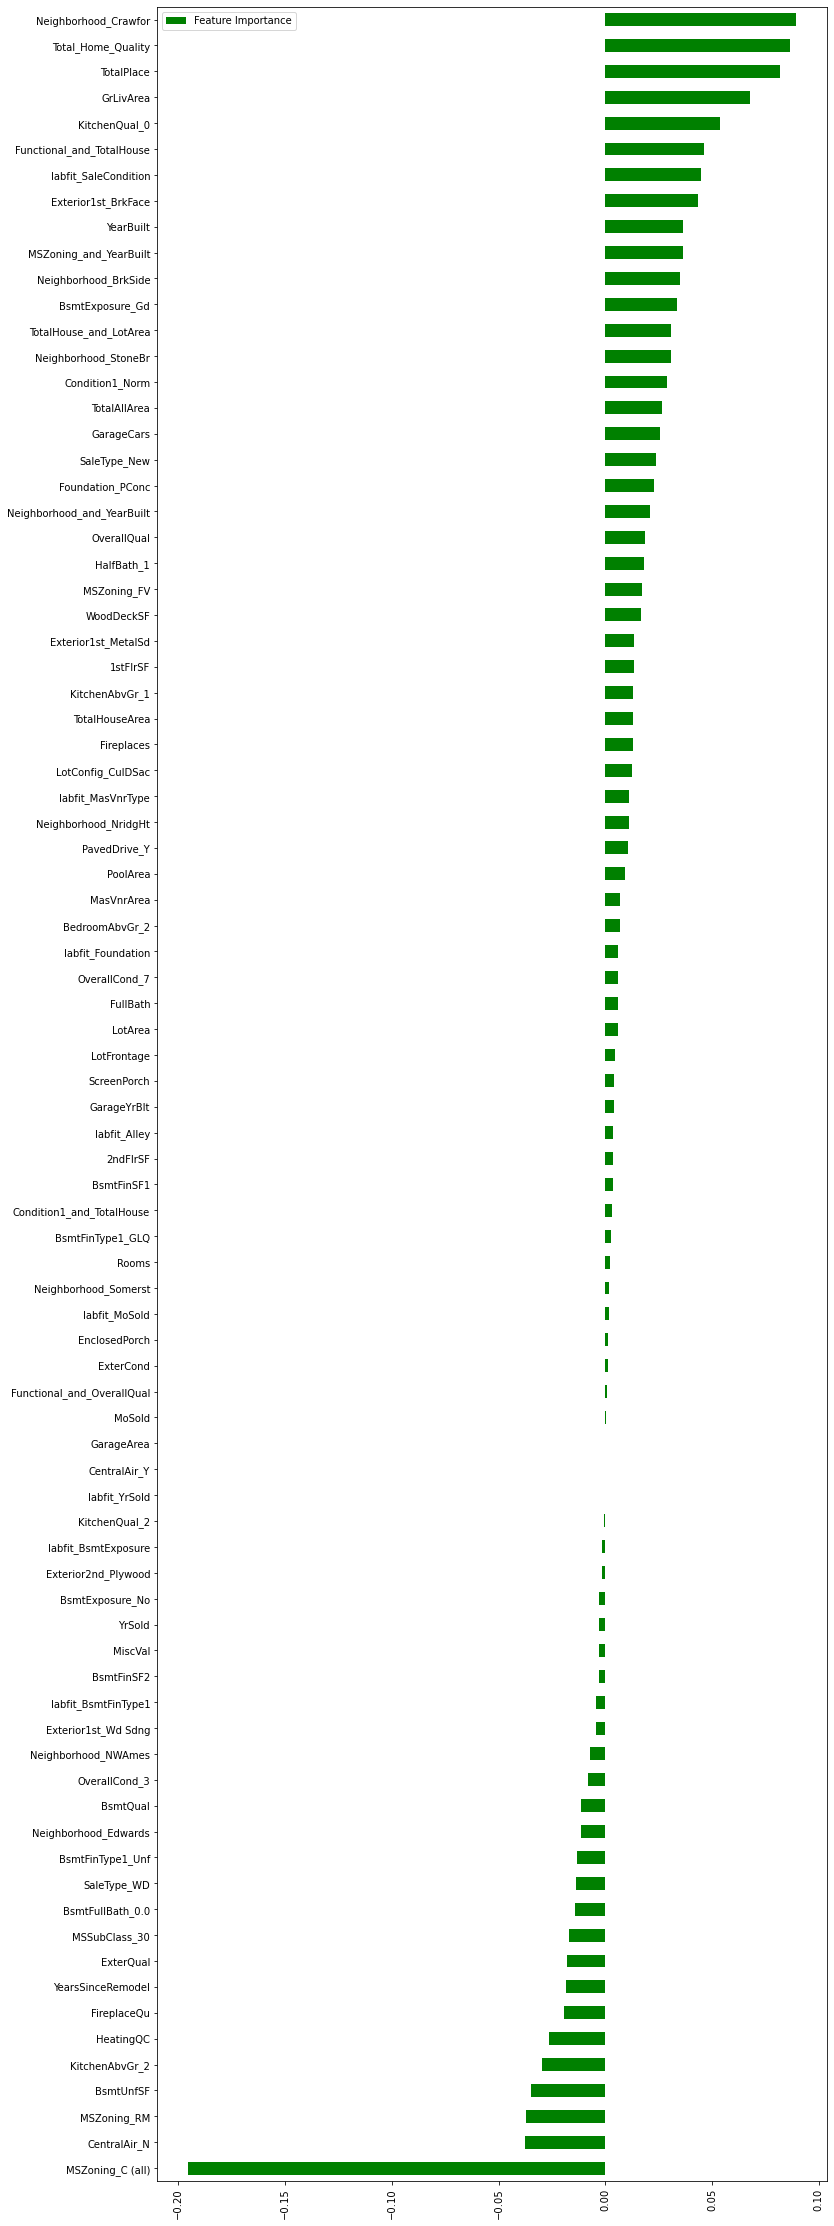

In [57]:
FI_lasso = FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance")
FI_lasso.plot(kind="barh",figsize=(12,40),color='g')
plt.xticks(rotation=90)

display(FI_lasso.shape)

In [58]:
choose_cols = FI_lasso.index.tolist()
choose_data = all_data[choose_cols].copy()

choose_data.shape

(2909, 84)

In [59]:
# 建模
# 划分数据集
train_X,test_X = choose_data[:train_num],choose_data[train_num:]
# 标准化
scaler = RobustScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

train_X.shape,test_X.shape,train_y.shape

((1450, 84), (1459, 84), (1450,))

In [60]:
# 建立模型
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LinearRegression
from sklearn.linear_model import ElasticNet,ElasticNetCV,SGDRegressor,BayesianRidge
from sklearn.svm import SVR,LinearSVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [61]:
from xgboost import XGBRegressor
# Misc
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [62]:
kf = KFold(n_splits=12,random_state=42,shuffle=True)

In [63]:
# 评分函数
def rmse(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

def cv_rmse(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=kf))
    return rmse

In [64]:
# 主成分分析
pca_model = PCA(n_components=60)
train_X = pca_model.fit_transform(train_X)
test_X = pca_model.transform(test_X)

In [65]:
# 网格搜索
def get_best_model_and_accuracy(model,params,X,y):
    grid = GridSearchCV(model,params,scoring="neg_mean_squared_error",cv=5,n_jobs=-1,error_score=0.)
    grid.fit(X,y)
    print("Best Score:{}".format(np.sqrt(-grid.best_score_)))
    print("Best Parameters: {}".format(grid.best_params_))
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
    grid.cv_results_['mean_test_score'] = np.sqrt(-grid.cv_results_['mean_test_score'])
    print(pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score']])
    return grid

In [66]:
#lasso
param_Lasso = {'alpha': [0.0004,0.0005,0.0006],
               'max_iter':[10000],'random_state':[1]}
Lasso_grid =get_best_model_and_accuracy(Lasso(),param_Lasso,train_X,train_y)

Best Score:0.1116389512745124
Best Parameters: {'alpha': 0.0005, 'max_iter': 10000, 'random_state': 1}
Average Time to Fit (s): 0.004
Average Time to Score (s): 0.0
                                                    params  mean_test_score  \
0  {'alpha': 0.0004, 'max_iter': 10000, 'random_state': 1}         0.111642   
1  {'alpha': 0.0005, 'max_iter': 10000, 'random_state': 1}         0.111639   
2  {'alpha': 0.0006, 'max_iter': 10000, 'random_state': 1}         0.111691   

   std_test_score  
0        0.000910  
1        0.000932  
2        0.000949  


In [67]:
#ridge
param_Ridge = {'alpha':[35,40,45,50,55]}
Ridge_grid =get_best_model_and_accuracy(Ridge(),param_Ridge,train_X,train_y)

Best Score:0.11153484863132575
Best Parameters: {'alpha': 35}
Average Time to Fit (s): 0.015
Average Time to Score (s): 0.0
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.111535        0.000992
1  {'alpha': 40}         0.111580        0.001007
2  {'alpha': 45}         0.111638        0.001021
3  {'alpha': 50}         0.111707        0.001033
4  {'alpha': 55}         0.111784        0.001043


In [68]:
#SVR
param_SVR = {'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],
             "epsilon":[0.008,0.009]}
SVR_grid =get_best_model_and_accuracy(SVR(),param_SVR,train_X,train_y)

Best Score:0.11137589983432994
Best Parameters: {'C': 15, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}
Average Time to Fit (s): 0.217
Average Time to Score (s): 0.028
                                                           params  \
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}   
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}   
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}   
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}   
4   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}   
5   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}   
6   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}   
7   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}   
8   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}   
9   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}   
10  {'C': 13, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}  

In [69]:
# KernelRidge
param_KernelRidge = {'alpha':[0.3,0.4,0.5], 'kernel':["polynomial"],
              'degree':[3],'coef0':[0.8,1,1.2]}

KernelRidge_grid =get_best_model_and_accuracy(KernelRidge(),param_KernelRidge,train_X,train_y)

Best Score:0.12047174703325851
Best Parameters: {'alpha': 0.5, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}
Average Time to Fit (s): 0.271
Average Time to Score (s): 0.032
                                                              params  \
0  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
1    {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
2  {'alpha': 0.3, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}   
3  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
4    {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
5  {'alpha': 0.4, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}   
6  {'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
7    {'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
8  {'alpha': 0.5, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}   

   mean_test_score  std_test_score  
0         0.131571        0.001469  
1         0.124776        0

In [70]:
# ElasticNet
param_ElasticNet = {'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5],
                    'max_iter':[10000],'random_state':[3]}
ElasticNet_grid =get_best_model_and_accuracy(ElasticNet(),param_ElasticNet,train_X,train_y)

Best Score:0.11156254590735423
Best Parameters: {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}
Average Time to Fit (s): 0.004
Average Time to Score (s): 0.001
                                                                       params  \
0   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}   
1    {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter': 10000, 'random_state': 3}   
2    {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter': 10000, 'random_state': 3}   
3    {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter': 10000, 'random_state': 3}   
4    {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}   
5     {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': 10000, 'random_state': 3}   
6     {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': 10000, 'random_state': 3}   
7     {'alpha': 0.004, 'l1_ratio': 0.5, 'max_iter': 10000, 'random_state': 3}   
8    {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}   
9    

In [71]:
bay = BayesianRidge()
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                   learning_rate=0.05, max_depth=3,
                   min_child_weight=1.7817, n_estimators=2200,
                   reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, 
                   silent=1,random_state =7, nthread = -1)

lgbm = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, 
                     n_estimators=700,max_bin = 55,
                     bagging_fraction = 0.8,bagging_freq = 5, 
                     feature_fraction = 0.25,feature_fraction_seed=9, 
                     bagging_seed=9,min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)


GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10,
                                loss='huber', random_state =5)

In [72]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self,mod,meta_model):
        self.mod = mod  # 首层学习器模型
        self.meta_model = meta_model  # 次学习器模型
        # 堆叠的最大特征划分折数
        self.k=5
        self.kf = KFold(n_splits=self.k, random_state=42, shuffle=True)
    
    # 训练数据
    def fit(self,X,y):
        # self.saved_model包含所有第一层学习器
        self.saved_model = [list() for i in self.mod]
        # 维度：训练样本行数*模型数量
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod): # 返回索引和模型本身
            #返回数据分割成分(训练集和验证集对应元素)的索引
            for train_index, val_index in self.kf.split(X,y):  
                renew_model = clone(model) # 模型的复制
                # 对分割出来的训练集数据进行训练
                renew_model.fit(X[train_index], y[train_index])
                # 添加模型 
                self.saved_model[i].append(renew_model)
                # 保存对应模型的验证集预测值
                oof_train[val_index,i] = renew_model.predict(X[val_index])


        # 次学习器模型训练，这里只是用到了首层预测值作为特征
        self.meta_model.fit(oof_train,y)
        return self
    
    # 测试数据
    def predict(self,X):
        # 得到的是整个测试集的首层预测值,np.column_stack:左右根据列拼接 mean(axis=1):跨列求和
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model])
        # 返回次学习器模型对整个测试集的首层预测值的最终预测
        return self.meta_model.predict(whole_test)            
    
    ## 获取首层学习结果的堆叠特征
    def get_oof(self,X,y,test_X):                 
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],self.k))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                # 预测结果保存
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            # 对每个模型的测试集预测K-Fold结果取均值
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [73]:
lasso = Lasso_grid.best_estimator_
ridge = Ridge_grid.best_estimator_
svr = SVR_grid.best_estimator_
ker = KernelRidge_grid.best_estimator_
ela= ElasticNet_grid.best_estimator_

stack_model = stacking(mod=[bay,lasso,ridge,svr,ker,ela], meta_model=ker)

# 查看训练集精度
score = cv_rmse(stack_model,train_X,train_y)
display(score.mean())

0.10819091622488312

In [74]:
# 第二层学习器特征获取
x_train_stack, x_test_stack = stack_model.get_oof(train_X,train_y,test_X)

In [75]:
train_X.shape,train_y.shape,test_X.shape

((1450, 60), (1450,), (1459, 60))

In [76]:
# 第一层总共6个模型
x_train_stack.shape, x_test_stack.shape

((1450, 6), (1459, 6))

In [77]:
# 将stacking特征和数据原始的特征拼接,水平方向上
x_train_add = np.hstack((train_X,x_train_stack))
x_test_add = np.hstack((test_X,x_test_stack))

In [78]:
x_train_add.shape,x_test_add.shape

((1450, 66), (1459, 66))

In [79]:
# 查看拼接特征后的精度,发现效果有所提升
score =  cv_rmse(stack_model,x_train_add,train_y)
print(score.mean())

0.10184850708626335


In [80]:
param_Lasso = {'alpha': [0.0004,0.0005,0.0006],
               'max_iter':[10000],'random_state':[1]}
Lasso_2 =get_best_model_and_accuracy(Lasso(),param_Lasso,x_train_add,train_y)

Best Score:0.1111892351455235
Best Parameters: {'alpha': 0.0005, 'max_iter': 10000, 'random_state': 1}
Average Time to Fit (s): 0.016
Average Time to Score (s): 0.002
                                                    params  mean_test_score  \
0  {'alpha': 0.0004, 'max_iter': 10000, 'random_state': 1}         0.111196   
1  {'alpha': 0.0005, 'max_iter': 10000, 'random_state': 1}         0.111189   
2  {'alpha': 0.0006, 'max_iter': 10000, 'random_state': 1}         0.111220   

   std_test_score  
0        0.001002  
1        0.001021  
2        0.001038  


In [81]:
param_Ridge = {'alpha':[35,40,45,50,55]}
Ridge_2 =get_best_model_and_accuracy(Ridge(),param_Ridge,x_train_add,train_y)

Best Score:0.11147944373556669
Best Parameters: {'alpha': 35}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.001
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.111479        0.000997
1  {'alpha': 40}         0.111511        0.001010
2  {'alpha': 45}         0.111547        0.001020
3  {'alpha': 50}         0.111588        0.001030
4  {'alpha': 55}         0.111633        0.001039


In [82]:
param_SVR = {'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],
             "epsilon":[0.008,0.009]}
SVR_2 =get_best_model_and_accuracy(SVR(),param_SVR,x_train_add,train_y)

Best Score:0.11146220930596136
Best Parameters: {'C': 15, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}
Average Time to Fit (s): 0.313
Average Time to Score (s): 0.043
                                                           params  \
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}   
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}   
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}   
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}   
4   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}   
5   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}   
6   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}   
7   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}   
8   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}   
9   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}   
10  {'C': 13, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}  

In [83]:
param_KernelRidge = {'alpha':[0.3,0.4,0.5], 'kernel':["polynomial"],
              'degree':[3],'coef0':[0.8,1,1.2]}

KernelRidge_2 =get_best_model_and_accuracy(KernelRidge(),param_KernelRidge,x_train_add,train_y)

Best Score:0.11630820537535934
Best Parameters: {'alpha': 0.5, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}
Average Time to Fit (s): 0.27
Average Time to Score (s): 0.041
                                                              params  \
0  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
1    {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
2  {'alpha': 0.3, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}   
3  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
4    {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
5  {'alpha': 0.4, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}   
6  {'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
7    {'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
8  {'alpha': 0.5, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}   

   mean_test_score  std_test_score  
0         0.120945        0.001846  
1         0.119157        0.

In [84]:
param_ElasticNet = {'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5],
                    'max_iter':[10000],'random_state':[3]}
ElasticNet_2 =get_best_model_and_accuracy(ElasticNet(),param_ElasticNet,x_train_add,train_y)

Best Score:0.10770471545666606
Best Parameters: {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}
Average Time to Fit (s): 0.068
Average Time to Score (s): 0.001
                                                                       params  \
0   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}   
1    {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter': 10000, 'random_state': 3}   
2    {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter': 10000, 'random_state': 3}   
3    {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter': 10000, 'random_state': 3}   
4    {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}   
5     {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': 10000, 'random_state': 3}   
6     {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': 10000, 'random_state': 3}   
7     {'alpha': 0.004, 'l1_ratio': 0.5, 'max_iter': 10000, 'random_state': 3}   
8    {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter': 10000, 'random_state': 3}   
9   

In [ ]:
# 

In [85]:
bay_2 = BayesianRidge()
xgb_2 = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05,
                     max_depth=3,min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, 
                   reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1)

lgbm_2 = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05,
                       n_estimators=700,max_bin = 55,bagging_fraction = 0.8,bagging_freq = 5,
                       feature_fraction = 0.25,feature_fraction_seed=9, 
                       bagging_seed=9,min_data_in_leaf = 6, 
                       min_sum_hessian_in_leaf = 11)

GBR_2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4,
                                  max_features='sqrt',min_samples_leaf=15,
                                  min_samples_split=10,
                                  loss='huber', 
                                  random_state =5)

lasso_2 = Lasso_2.best_estimator_
ridge_2 = Ridge_2.best_estimator_
svr_2 = SVR_2.best_estimator_
ker_2 = KernelRidge_2.best_estimator_
ela_2 = ElasticNet_2.best_estimator_

stack_model_2 = stacking(mod=[bay_2,lasso_2,ridge_2,svr_2,ker_2,ela_2], meta_model=ker_2)

In [86]:
last_x_train_stack, last_x_test_stack = stack_model_2.get_oof(x_train_add,train_y,x_test_add)

last_x_train_stack.shape, last_x_test_stack.shape

((1450, 6), (1459, 6))

In [87]:
param_ker = {'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"],
              'degree':[3,4],'coef0':[0.8,1,1.2]}
Ker_stack_model=get_best_model_and_accuracy(KernelRidge(),
                            param_ker,last_x_train_stack,train_y).best_estimator_

Best Score:0.08770246977669356
Best Parameters: {'alpha': 0.2, 'coef0': 1.2, 'degree': 4, 'kernel': 'polynomial'}
Average Time to Fit (s): 0.233
Average Time to Score (s): 0.032
                                                               params  \
0   {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
1   {'alpha': 0.2, 'coef0': 0.8, 'degree': 4, 'kernel': 'polynomial'}   
2     {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
3     {'alpha': 0.2, 'coef0': 1, 'degree': 4, 'kernel': 'polynomial'}   
4   {'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}   
5   {'alpha': 0.2, 'coef0': 1.2, 'degree': 4, 'kernel': 'polynomial'}   
6   {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}   
7   {'alpha': 0.3, 'coef0': 0.8, 'degree': 4, 'kernel': 'polynomial'}   
8     {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}   
9     {'alpha': 0.3, 'coef0': 1, 'degree': 4, 'kernel': 'polynomial'}   
10  {'alpha': 0.3, 

In [88]:
cv_rmse(Ker_stack_model,last_x_train_stack,train_y).mean()

0.08620426818999094

In [89]:
# 注意之前对目标数据做过log变换
y_pred_stack = np.expm1(Ker_stack_model.predict(last_x_test_stack))

In [90]:
stack_model = stacking(mod=[lgbm,ela,svr,ridge,lasso,bay,xgb,GBR,ker],
                       meta_model=KernelRidge(alpha=0.2 ,kernel='polynomial',
                                              degree=4, coef0=0.8))

stack_model.fit(x_train_add,train_y)
y_pred_stack_2 = np.exp(stack_model.predict(x_test_add))

[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightG

In [91]:
xgb.fit(last_x_train_stack,train_y)
y_pred_xgb = np.expm1(xgb.predict(last_x_test_stack))
# 交叉验证
cv_rmse(xgb,x_train_stack,train_y).mean()

0.11228366495866136

In [92]:
# 训练集误差
y_train_xgb = xgb.predict(last_x_train_stack)
rmse(y_train_xgb,train_y)

0.08814508874129601

In [93]:
lgbm.fit(last_x_train_stack,train_y)
y_pred_lgbm = np.expm1(lgbm.predict(last_x_test_stack))

cv_rmse(lgbm,x_train_stack,train_y).mean()

[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightG

0.11422938922198456

In [94]:
y_train_lgbm = xgb.predict(x_train_stack)
rmse(y_train_lgbm,train_y)

0.10850265669941493

In [95]:
# 模型融合
y_pred = (0.7*y_pred_stack)+(0.15*y_pred_xgb)+(0.15*y_pred_lgbm)

In [96]:
submission = pd.read_csv("sample_submission.csv")

submission.shape,y_pred.shape

((1459, 2), (1459,))

In [97]:
submission.iloc[:,1] = y_pred
submission.to_csv(r'./house_submission.csv',index=False)

submission.head()

,Id,SalePrice
0,1461,119979.988799
1,1462,159168.108534
2,1463,188171.764106
3,1464,192376.425816
4,1465,194194.972403


In [98]:
from sklearn.model_selection import StratifiedKFold,train_test_split


# 模型融合中使用到的各个单模型
clfs = [BayesianRidge(),Lasso(),Ridge(),SVR(),KernelRidge(),ElasticNet()]


# 切分训练数据集为train,val两部分
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y,test_size=0.33, random_state=1855)
dataset_val = np.zeros((X_val.shape[0], len(clfs))) # 对验证集的预测
dataset_test = np.zeros((test_X.shape[0], len(clfs))) #对测试集的预测 

# 依次训练各个单模型
for j, clf in enumerate(clfs):

    # 使用train_X训练模型，获得其预测的输出作为第2部分的新特征
    clf.fit(X_train, y_train)
    dataset_val[:, j] = clf.predict(X_val)
    # 对于测试集，直接用这k个模型的预测值作为新的特征
    dataset_test[:, j] = clf.predict(test_X)

# 融合使用的模型
clf =  XGBRegressor()
clf.fit(dataset_val, y_val)

# 注意前面对目标数据做过log变换
y_submission = np.expm1(clf.predict(dataset_test))
cv_rmse(clf,train_X,train_y).mean()

[17:13:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

0.13122484446155527

In [99]:
y_submission

array([122437.77, 152725.97, 186010.19, ..., 170159.36, 117372.98,
       231910.84], dtype=float32)

In [100]:
y_pred_stack

array([119868.39777929, 159110.08170951, 189101.22308498, ...,
       178747.86759382, 124459.99184251, 224858.32570597])

In [101]:
# 使用mlxtend包
stack_gen = StackingCVRegressor(regressors=(lgbm,ela,svr,ridge,lasso,bay,xgb,GBR,ker),
                                meta_regressor=ker,
                                use_features_in_secondary=True)# 元分类器将根据原始回归器和原始数据集的预测进行训练

In [102]:
scores = {}

score = cv_rmse(lgbm,train_X,train_y)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgbm'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightG

In [103]:
score = cv_rmse(ela,train_X,train_y)
print("ElasticNet: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ela'] = (score.mean(), score.std())

ElasticNet: 0.1105 (0.0113)


In [104]:
score = cv_rmse(svr,train_X,train_y)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1099 (0.0125)


In [105]:
score = cv_rmse(ridge,train_X,train_y)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1106 (0.0114)


In [106]:
score = cv_rmse(lasso,train_X,train_y)
print("Lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Lasso'] = (score.mean(), score.std())

Lasso: 0.1106 (0.0112)


In [107]:
score = cv_rmse(bay,train_X,train_y)
print("bay: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['bay'] = (score.mean(), score.std())

bay: 0.1106 (0.0115)


In [108]:
score = cv_rmse(xgb,train_X,train_y)
print("xgb: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgb: 0.1258 (0.0107)


In [109]:
score = cv_rmse(GBR,train_X,train_y)
print("GBR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['GBR'] = (score.mean(), score.std())

GBR: 0.1313 (0.0109)


In [110]:
score = cv_rmse(ker,train_X,train_y)
print("ker: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ker'] = (score.mean(), score.std())

ker: 0.1186 (0.0127)


In [111]:
score = cv_rmse(stack_gen,train_X,train_y)
print("stack_gen: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['stack_gen'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightG

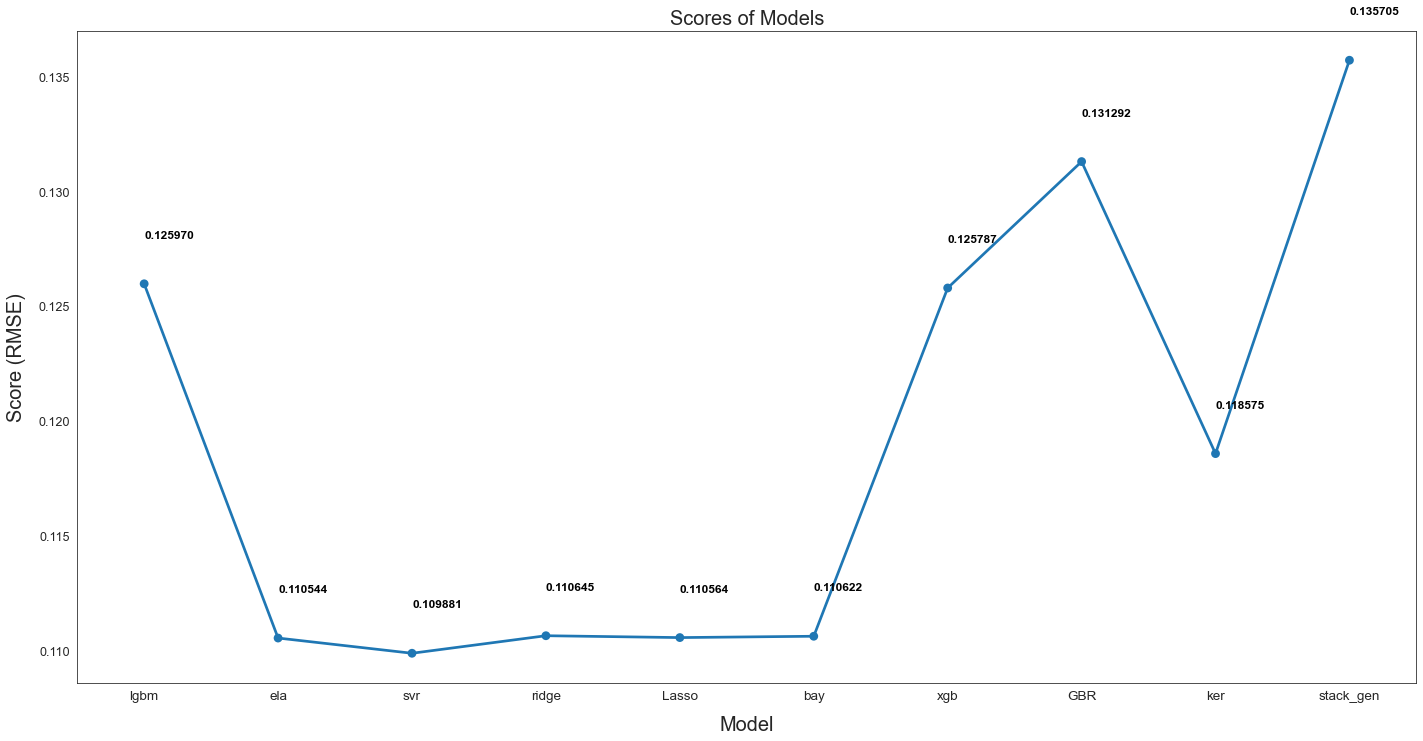

In [112]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()],
                                            markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]),
            horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)
plt.show()